In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

In [2]:
base_path = Path('synthetic_fits_2')

mask = np.atleast_3d(nib.load('noisy_synthetic_data/mask.nii.gz').get_fdata())
mask = np.array(mask, dtype=bool)

In [3]:
df_acumulator = []
total_files = len(list(base_path.rglob('fit_*/concs/molarity/*.nii.gz')))
for idx, path in enumerate(base_path.rglob('fit_*/concs/molarity/*.nii.gz')):
#     print(path)
    metab = path.name[:-7]
    index = int(path.parent.parent.parent.name[-3:])
    denoising = path.parent.parent.parent.parent.name
    noise_level = float(path.parent.parent.parent.parent.parent.name.lstrip('noise_'))
    data = nib.load(path).get_fdata()[mask]
    voxels = np.arange(0, data.size)
    
    iterables = [[denoising], [noise_level], [metab], voxels, [index]]
    index = pd.MultiIndex.from_product(iterables, names=["method", "noise", "metabolite", "voxels", "index"])
    df_acumulator.append(pd.Series(data, index=index))
    
#     if idx == 5:
#         break
    if not idx % 500:
        print(f'{idx}/{total_files} done')
    
df_molarity = pd.concat(df_acumulator,join='inner')

0/20250 done
500/20250 done
1000/20250 done
1500/20250 done
2000/20250 done
2500/20250 done
3000/20250 done
3500/20250 done
4000/20250 done
4500/20250 done
5000/20250 done
5500/20250 done
6000/20250 done
6500/20250 done
7000/20250 done
7500/20250 done
8000/20250 done
8500/20250 done
9000/20250 done
9500/20250 done
10000/20250 done
10500/20250 done
11000/20250 done
11500/20250 done
12000/20250 done
12500/20250 done
13000/20250 done
13500/20250 done
14000/20250 done
14500/20250 done
15000/20250 done
15500/20250 done
16000/20250 done
16500/20250 done
17000/20250 done
17500/20250 done
18000/20250 done
18500/20250 done
19000/20250 done
19500/20250 done
20000/20250 done


In [4]:
df_acumulator = []
total_files = len(list(base_path.rglob('fit_*/uncertainties/*.nii.gz')))
for idx, path in enumerate(base_path.rglob('fit_*/uncertainties/*.nii.gz')):
#     print(path)
    metab = path.name[:-10]
    index = int(path.parent.parent.name[-3:])
    denoising = path.parent.parent.parent.name
    noise_level = float(path.parent.parent.parent.parent.name.lstrip('noise_'))
    data = nib.load(path).get_fdata()[mask]
    voxels = np.arange(0, data.size)
    
    iterables = [[denoising], [noise_level], [metab], voxels, [index]]
    index = pd.MultiIndex.from_product(iterables, names=["method", "noise", "metabolite", "voxels", "index"])
    df_acumulator.append(pd.Series(data, index=index))
    
#     if idx == 5:
#         break
    if not idx % 500:
        print(f'{idx}/{total_files} done')
    
df_fit_crlb = pd.concat(df_acumulator,join='inner')

0/20250 done
500/20250 done
1000/20250 done
1500/20250 done
2000/20250 done
2500/20250 done
3000/20250 done
3500/20250 done
4000/20250 done
4500/20250 done
5000/20250 done
5500/20250 done
6000/20250 done
6500/20250 done
7000/20250 done
7500/20250 done
8000/20250 done
8500/20250 done
9000/20250 done
9500/20250 done
10000/20250 done
10500/20250 done
11000/20250 done
11500/20250 done
12000/20250 done
12500/20250 done
13000/20250 done
13500/20250 done
14000/20250 done
14500/20250 done
15000/20250 done
15500/20250 done
16000/20250 done
16500/20250 done
17000/20250 done
17500/20250 done
18000/20250 done
18500/20250 done
19000/20250 done
19500/20250 done
20000/20250 done


In [5]:
df_acumulator = []
total_files = len(list(base_path.rglob('bs_fit_*/uncertainties/molarity/*.nii.gz')))
for idx, path in enumerate(base_path.rglob('bs_fit_*/uncertainties/molarity/*.nii.gz')):
#     print(path)
    metab = path.name[:-7]
    index = int(path.parent.parent.parent.name[-3:])
    denoising = path.parent.parent.parent.parent.name
    noise_level = float(path.parent.parent.parent.parent.parent.name.lstrip('noise_'))
    data = nib.load(path).get_fdata()[mask]
    voxels = np.arange(0, data.size)
    
    iterables = [[denoising], [noise_level], [metab], voxels, [index]]
    index = pd.MultiIndex.from_product(iterables, names=["method", "noise", "metabolite", "voxels", "index"])
    df_acumulator.append(pd.Series(data, index=index))
    
#     if idx == 5:
#         break
    if not idx % 500:
        print(f'{idx}/{total_files} done')
    
df_bs_uncertainty = pd.concat(df_acumulator,join='inner')

0/1350 done
500/1350 done
1000/1350 done


#### Data for variance/covariance estimation accuracy

In [6]:
df_acumulator = []
df_var_acumulator = []

total_files = len(list(base_path.rglob('denoise_0*_var.nii.gz')))
for idx, path in enumerate(base_path.rglob('denoise_0*_var.nii.gz')):
    index = int(path.name[-14:-11])
    denoising = path.parent.name
    noise_level = float(path.parent.parent.name.lstrip('noise_'))
    d_path = path.parent / (path.with_suffix('').with_suffix('').stem[:-4] + '.nii.gz')
#     dc_path = path.parent / (path.with_suffix('').with_suffix('').stem[:-4] + '_covar')
    data = nib.load(d_path).get_fdata(dtype=complex)[24,24,0,:]
    data_var = nib.load(path).get_fdata(dtype=complex)[24,24,0,:].real
    
    t = np.arange(0, data.size)
    iterables = [[denoising], [noise_level], [index], t]
    index = pd.MultiIndex.from_product(iterables, names=["method", "noise", "index", "t"])
    df_acumulator.append(pd.Series(data, index=index))
    df_var_acumulator.append(pd.Series(data_var, index=index))
    
#     if idx == 5:
#         break
    if not idx % 100:
        print(f'{idx}/{total_files} done')
        
df_denoised_data = pd.concat(df_acumulator,join='inner')
df_denoised_var = pd.concat(df_var_acumulator,join='inner')

0/500 done
100/500 done
200/500 done
300/500 done
400/500 done


### Look at estimated variance and covariance

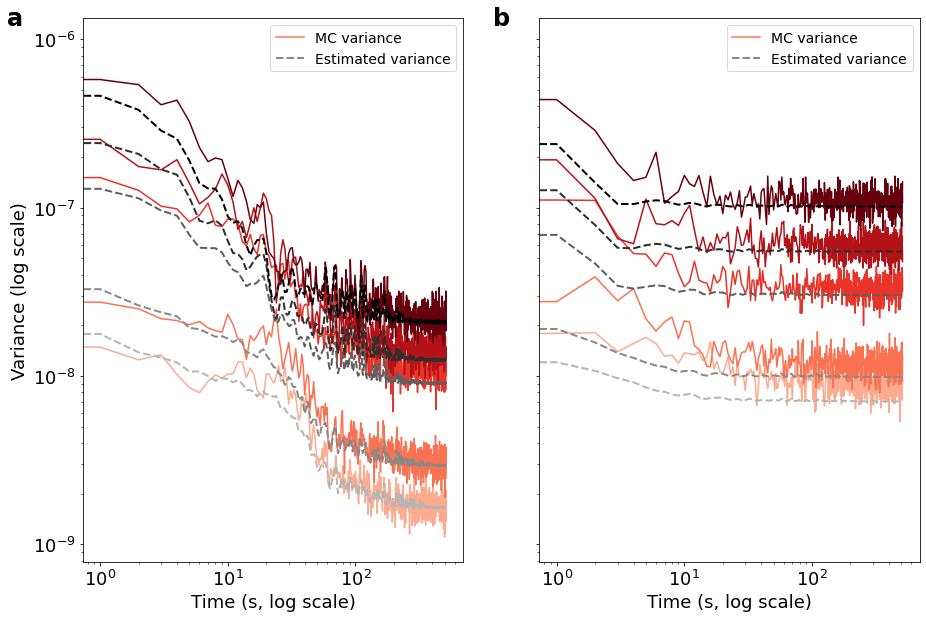

In [7]:
def myvar(x):   
    return np.var(x.to_numpy())
mc_var = df_denoised_data.groupby(level=["method", "noise", "t"]).apply(myvar).sort_index(level='noise')
est_var = df_denoised_var.mean(level=["method", "noise", "t"])
est_var_sd = df_denoised_var.std(level=["method", "noise", "t"])

noise_lvl = mc_var.index.unique(level='noise').to_numpy()

plt.rcParams.update({'font.size': 18})
plt.rc('legend', fontsize=14)    # legend fontsize
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10),sharey=True)

cmap = plt.get_cmap("Reds")
colors1 = [cmap(i) for i in np.linspace(0.3,1,len(noise_lvl))]
cmap = plt.get_cmap("Greys")
colors2 = [cmap(i) for i in np.linspace(0.4,1,len(noise_lvl))]

for nv,c1,c2 in zip(noise_lvl,colors1,colors2):
    if nv == 1:
        ax1.loglog(mc_var.xs(('st_g',nv),level=("method", "noise")),color=c1, label='MC variance')
        ax2.loglog(mc_var.xs(('st_l',nv),level=("method", "noise")),color=c1, label='MC variance')

        ax1.loglog(est_var.xs(('st_g',nv),level=("method", "noise")),'--',color=c2, linewidth=2, label='Estimated variance')
        ax2.loglog(est_var.xs(('st_l',nv),level=("method", "noise")),'--',color=c2, linewidth=2, label='Estimated variance')
    else:
        ax1.loglog(mc_var.xs(('st_g',nv),level=("method", "noise")),color=c1)
        ax2.loglog(mc_var.xs(('st_l',nv),level=("method", "noise")),color=c1)

        ax1.loglog(est_var.xs(('st_g',nv),level=("method", "noise")),'--',color=c2, linewidth=2)
        ax2.loglog(est_var.xs(('st_l',nv),level=("method", "noise")),'--',color=c2, linewidth=2)
    
ax1.set_xlabel('Time (s, log scale)')
ax2.set_xlabel('Time (s, log scale)')
ax1.set_ylabel('Variance (log scale)')

ax1.legend()
ax2.legend()

fig.text(0.055, 0.87,'a',fontweight='bold',fontsize=24)
fig.text(0.505, 0.87,'b',fontweight='bold',fontsize=24)

plt.savefig('figures/supp_fig_6_syn_var_est.png', bbox_inches='tight', dpi=300)


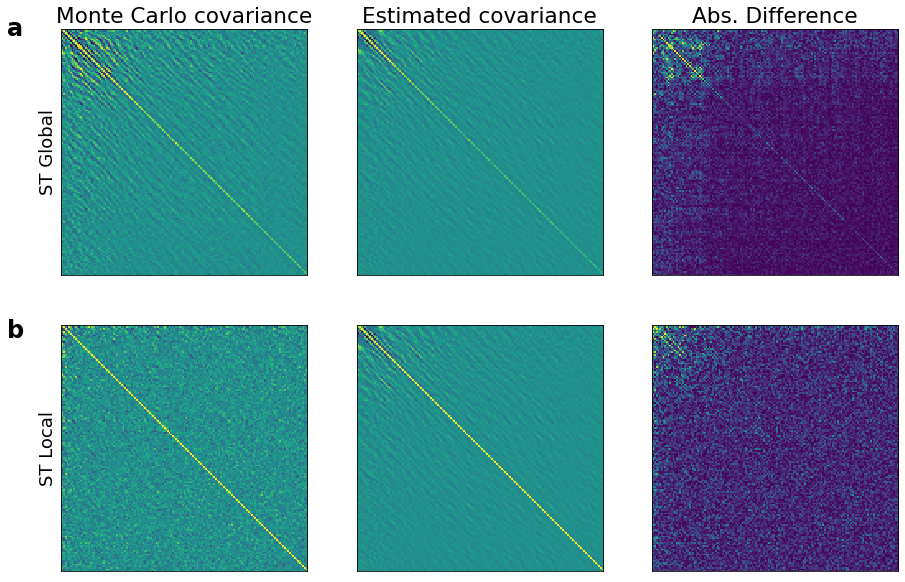

In [8]:
covar_noise_level = 5

est_covar_stg = np.loadtxt(base_path / f'noise_{covar_noise_level}' / 'st_g' / 'denoise_000_covar', dtype=complex)
est_covar_stl = np.loadtxt(base_path / f'noise_{covar_noise_level}' / 'st_g' / 'denoise_000_covar', dtype=complex)

heuristic_covar_stg = est_covar_stg - np.diag(np.diag(est_covar_stg)) + np.diag(df_denoised_var.xs(('st_g',5,0),level=("method", "noise", "index")).to_numpy())
heuristic_covar_stl = est_covar_stl - np.diag(np.diag(est_covar_stl)) + np.diag(df_denoised_var.xs(('st_l',5,0),level=("method", "noise", "index")).to_numpy())

covar_mc_stg = np.cov(df_denoised_data.xs(('st_g',covar_noise_level),level=("method", "noise")).to_numpy().reshape(-1,512).T)
covar_mc_stl = np.cov(df_denoised_data.xs(('st_l',covar_noise_level),level=("method", "noise")).to_numpy().reshape(-1,512).T)

fig, axes = plt.subplots(2,3,figsize=(15,10))

scaling = 10
stg_min = np.min(covar_mc_stg.real)
stg_max = np.max(covar_mc_stg.real)
axes[0,0].matshow(covar_mc_stg.real,vmin= -1 * stg_max/scaling, vmax=stg_max/scaling)
axes[0,1].matshow(heuristic_covar_stg.real,vmin= -1 * stg_max/scaling, vmax=stg_max/scaling)
axes[0,2].matshow(np.abs(heuristic_covar_stg.real-covar_mc_stg.real),vmin=0, vmax=stg_max/scaling)

stl_min = np.min(covar_mc_stl.real)
stl_max = np.max(covar_mc_stl.real)
axes[1,0].matshow(covar_mc_stl.real,vmin= -1 * stl_max/scaling, vmax=stl_max/scaling)
axes[1,1].matshow(heuristic_covar_stl.real,vmin= -1 * stl_max/scaling, vmax=stl_max/scaling)
axes[1,2].matshow(np.abs(heuristic_covar_stl.real-covar_mc_stl.real),vmin=0, vmax=stl_max/scaling)

axes[0,0].set_title('Monte Carlo covariance')
axes[0,1].set_title('Estimated covariance')
axes[0,2].set_title('Abs. Difference')
axes[0,0].set_ylabel('ST Global')
axes[1,0].set_ylabel('ST Local')


for ax in axes.ravel():
    ax.set_xlim([0, 150])
    ax.set_ylim([150, 0])
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.text(0.075, 0.87,'a',fontweight='bold',fontsize=24)
fig.text(0.075, 0.45,'b',fontweight='bold',fontsize=24)

plt.savefig('figures/supp_fig_7_syn_covar_est.png', bbox_inches='tight', dpi=300)


### Process the Monte Carlo (MC) estimated error

In [9]:
df_molarity_std = df_molarity.std(level=["method", "noise", "metabolite", "voxels"])
df_molarity_std.sort_index(level=1, inplace=True)
df_molarity_std

method  noise  metabolite  voxels
noisy   0.5    Asc         0         3.695491
                           1         3.083856
                           2         1.851117
                           3         1.538266
                           4         1.800121
                                       ...   
st_l    20.0   Tau         251       2.598998
                           252       3.360427
                           253       3.627658
                           254       2.482125
                           255       4.473088
Length: 103680, dtype: float64

### Process the FSL-MRS estimated fit error
- Remove any unfitted values (defaults to 999.0)
- Apply correction for complex values of sqrt(2). Arises from error in FSL-MRS Newton uncertainty estimation. 

In [10]:
df_fit_crlb.replace(999.0, np.nan,inplace=True)
df_crlb_mol = df_fit_crlb.mean(level=["method", "noise", "metabolite", "voxels"])\
                .divide(100)\
                .multiply(df_molarity.mean(level=["method", "noise", "metabolite", "voxels"]))
df_crlb_mol = df_crlb_mol.divide(np.sqrt(2))

### Process the boot-strap estimated error

In [11]:
df_bs_uncertainty_mean = df_bs_uncertainty.mean(level=["method", "noise", "metabolite", "voxels"])
df_bs_uncertainty_mean.sort_index(level=1, inplace=True)

df_bs_uncertainty_std = df_bs_uncertainty.std(level=["method", "noise", "metabolite", "voxels"])
df_bs_uncertainty_std.sort_index(level=1, inplace=True)

### Select Metabolites

In [12]:
# Define groups of metabolites to calculate across
metab_all_fitted = ['Cr', 'Tau', 'NAAG', 'MM14', 'GSH', 'Gln', 'Asp',
                    'Lac', 'Ins', 'MM12', 'PCr', 'MM17', 'MM09', 'Asc',
                    'MM21', 'Glu', 'GABA', 'Glc', 'Scyllo', 'GPC', 'PCho',
                    'NAA']
metab_all_large = ['Glu+Gln', 'Glc+Tau', 'PCho+GPC', 'NAA+NAAG', 'Ins', 'Cr+PCr']
metab_all_unique = ['Glu+Gln', 'Glc+Tau', 'PCho+GPC', 'MM14', 'GSH',
                    'Asp', 'NAA+NAAG', 'Lac', 'Ins', 'MM12', 'MM17', 'MM09',
                    'Asc', 'MM21', 'GABA', 'Scyllo', 'Cr+PCr']

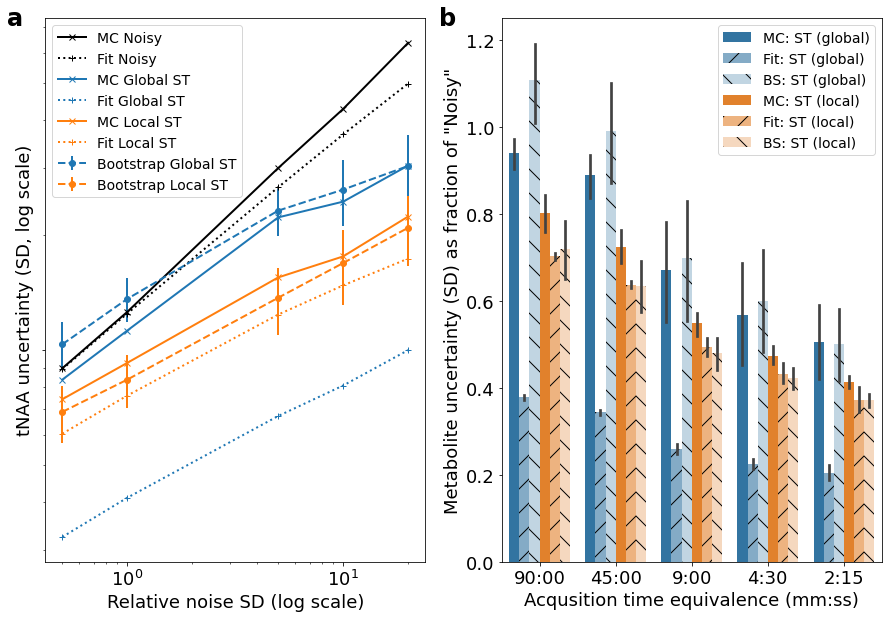

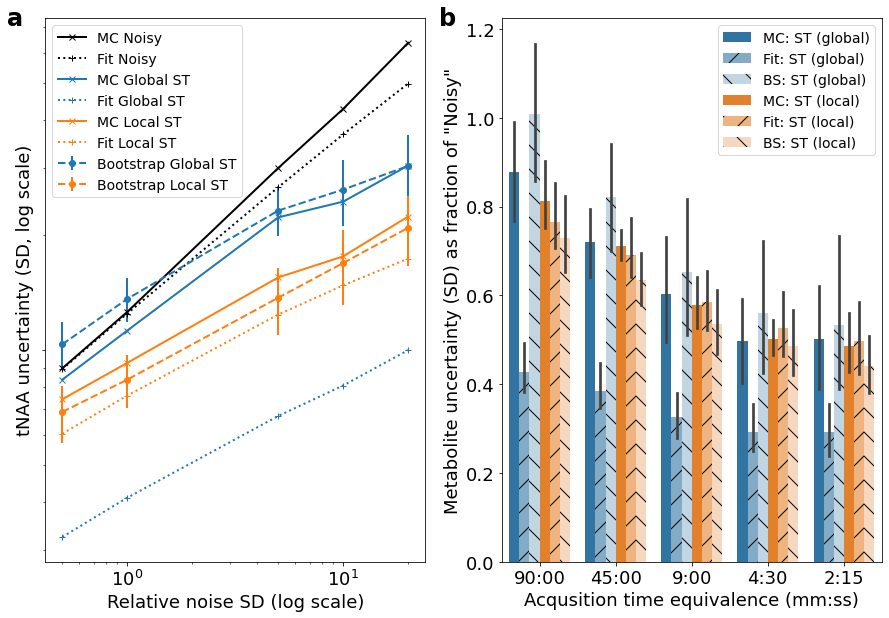

In [39]:
import seaborn as sns
import itertools

def make_plots(selected_metab, group_to_plot, save_path):
    df_molarity_std_selected = df_molarity_std.xs(selected_metab, level="metabolite")

    df_crlb_mol_selected = df_crlb_mol.xs(selected_metab, level="metabolite")

    df_bs_uncertainty_mean_selected = df_bs_uncertainty_mean.xs(selected_metab, level="metabolite")
    df_bs_uncertainty_std_selected = df_bs_uncertainty_std.xs(selected_metab, level="metabolite")

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10))

    # Pannel 1 - Single metabolite
    plt.rcParams.update({'font.size': 18})
    plt.rc('legend', fontsize=14)    # legend fontsize

    labels = ['Noisy', 'Global ST', 'Local ST']
    method_order = ['noisy', 'st_g', 'st_l']

    cmap = plt.get_cmap("tab10")
    colors = [cmap(i) for i in range(len(labels)-1)]
    colors = [(0,0,0,1),] + colors

    for method, label, color in zip(method_order, labels, colors):
        ax1.loglog(df_molarity_std_selected.loc[method].mean(level=0),'-x', color=color, label='MC ' + label, linewidth=2)
        ax1.loglog(df_crlb_mol_selected.loc[method].mean(level=0),':+', color=color, label='Fit ' + label, linewidth=2)

        if method != 'noisy':
    #         plt.loglog(df_bs_uncertainty_mean_selected.loc[method].mean(level=0),'-o', color=color, label='BS ' + label)
            x = df_bs_uncertainty_mean_selected.loc[method].mean(level=0).index.to_numpy()
            ax1.errorbar(x, df_bs_uncertainty_mean_selected.loc[method].mean(level=0),yerr=df_bs_uncertainty_std_selected.loc[method].mean(level=0),fmt='--o', color=color, label='Bootstrap ' + label, linewidth=2)

    ax1.legend()
    ax1.set_ylabel('tNAA uncertainty (SD, log scale)')
    ax1.set_xlabel('Relative noise SD (log scale)')
    ax1.set_yticklabels([])

    # Pannel 2 - all large metabolites
    # Uncertainty as ratio of mc noisy for different noise levels
    df_molarity_std_ratio = df_molarity_std.divide(df_molarity_std.xs('noisy',level="method"))
    df_crlb_mol_ratio = df_crlb_mol.divide(df_molarity_std.xs('noisy',level="method"))
    df_bs_ratio = df_bs_uncertainty_mean.divide(df_molarity_std.xs('noisy',level="method"))

    # Assemble data
    means_mc = df_molarity_std_ratio.mean(level=['metabolite','noise','method']).loc[group_to_plot]
    to_plot_mc = means_mc.reset_index().rename(columns={0:'value'})

    means_fit = df_crlb_mol_ratio.mean(level=['metabolite','noise','method']).loc[group_to_plot]
    to_plot_fit = means_fit.reset_index().rename(columns={0:'value'})
    to_plot_fit = to_plot_fit[to_plot_fit.method != 'noisy']
    to_plot_fit['method'] = to_plot_fit['method'] + '_fit'

    means_bs = df_bs_ratio.mean(level=['metabolite','noise','method']).loc[group_to_plot]
    to_plot_bs = means_bs.reset_index().rename(columns={0:'value'})
    to_plot_bs['method'] = to_plot_bs['method'] + '_bs'

    df_combined = pd.concat((to_plot_mc,to_plot_fit,to_plot_bs),ignore_index=True)
    df_combined = df_combined[df_combined.method != 'noisy']
    df_combined.replace(to_replace=['st_g','st_g_bs','st_g_fit','st_l','st_l_bs','st_l_fit'],
                        value=['MC: ST (global)','BS: ST (global)','Fit: ST (global)','MC: ST (local)','BS: ST (local)','Fit: ST (local)'],
                       inplace=True)

#     hue_order = ['MC: ST (global)','BS: ST (global)','Fit: ST (global)','MC: ST (local)','BS: ST (local)','Fit: ST (local)']
    hue_order = ['MC: ST (global)','Fit: ST (global)','BS: ST (global)','MC: ST (local)','Fit: ST (local)','BS: ST (local)']

    bax = sns.barplot(ax=ax2,
                x="noise",
                y="value",
                hue="method",
                data=df_combined,
                hue_order=hue_order,
                palette=[np.asarray(colors[1]),
                         np.asarray(colors[1]),
                         np.asarray(colors[1]),
                         np.asarray(colors[2]),
                         np.asarray(colors[2]),
                         np.asarray(colors[2])])
    
    # Define some hatches
    hatches = ([None]*5 + ['/']*5 + ['\\']*5)*2
    alpha = ([1]*5 + [0.6]*5 + [0.3]*5)*2
    # Loop over the bars
    for idx, thisbar in enumerate(bax.patches):
        # Set a different hatch for each bar
        thisbar.set_alpha(alpha[idx])
        thisbar.set_hatch(hatches[idx])
        
    
    ax2.set_ylabel('Metabolite uncertainty (SD) as fraction of "Noisy"')
    ax2.set_xlabel('Acqusition time equivalence (mm:ss)')
    ax2.set_xticklabels(['90:00', '45:00', '9:00', '4:30', '2:15'])

    bax.legend().set_title(None)

    fig.text(0.090, 0.87,'a',fontweight='bold',fontsize=24)
    fig.text(0.490, 0.87,'b',fontweight='bold',fontsize=24)

    plt.savefig(save_path, bbox_inches='tight', dpi=300)


selected_metab = 'NAA+NAAG'
make_plots(selected_metab, metab_all_large, 'figures/figure_8_synthetic_bootstrap_large.png')
make_plots(selected_metab, metab_all_unique, 'figures/supp_fig_8_synthetic_bootstrap_all.png')

### Numbers for results

In [14]:
df_molarity_std_ratio = df_molarity_std.divide(df_molarity_std.xs('noisy',level="method"))
df_crlb_mol_ratio = df_crlb_mol.divide(df_molarity_std.xs('noisy',level="method"))
df_bs_ratio = df_bs_uncertainty_mean.divide(df_molarity_std.xs('noisy',level="method"))

# Assemble data
means_mc = df_molarity_std_ratio.mean(level=['metabolite','noise','method']).loc[metab_all_large]
means_fit = df_crlb_mol_ratio.mean(level=['metabolite','noise','method']).loc[metab_all_large]
means_bs = df_bs_ratio.mean(level=['metabolite','noise','method']).loc[metab_all_large]

print('Fit')
print(f"st_g {means_fit.divide(means_mc).mean(level=2).loc['st_g']:0.2f}±{means_fit.divide(means_mc).std(level=2).loc['st_g']:0.2f}")
print(f"st_l {means_fit.divide(means_mc).mean(level=2).loc['st_l']:0.2f}±{means_fit.divide(means_mc).std(level=2).loc['st_l']:0.2f}")

print('BS')
print(f"st_g {means_bs.divide(means_mc).mean(level=2).loc['st_g']:0.2f}±{means_bs.divide(means_mc).std(level=2).loc['st_g']:0.2f}")
print(f"st_l {means_bs.divide(means_mc).mean(level=2).loc['st_l']:0.2f}±{means_bs.divide(means_mc).std(level=2).loc['st_l']:0.2f}")


Fit
st_g 0.41±0.10
st_l 0.90±0.09
BS
st_g 1.07±0.09
st_l 0.89±0.04
